## Estadística Aplicada
Sesión 6 - 23 agosto

Joel Fayam Rivera Peña 2076323

Grupo 42

In [2]:
## Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
## Librería especial del día de hoy
import statsmodels.formula.api as smf

In [12]:
pip install openpyxl


                                              0.0/250.0 kB ? eta -:--:--
     ----                                     30.7/250.0 kB ? eta -:--:--
     -----------------                      112.6/250.0 kB 1.6 MB/s eta 0:00:01
     -------------------------------------  245.8/250.0 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 250.0/250.0 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
## Importar los datos
datos=pd.read_excel('modelolineal.xlsx')

In [15]:
datos=datos[['X','Y']]

In [17]:
datos.head()

,X,Y
0,23,19.246957
1,19,16.878501
2,27,20.187237
3,13,12.176789
4,21,21.420112


## Repaso breve Minimos Cuadrados Ordinarios (MCO)

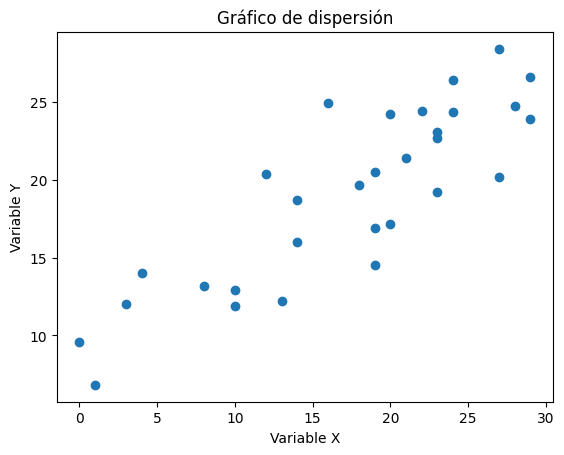

In [19]:
plt.scatter(datos['X'],datos['Y'])
plt.title('Gráfico de dispersión')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.show()

De acuerdo con la gráfica, hay una relación lineal entre X e Y. Es plausible estimar un modelo lineal de MCO

In [20]:
## Estimar el modelo
    # 1.Definir el modelo
reg=smf.ols(formula='Y~X',data=datos)
    # 2.Estimar el modelo
results=reg.fit()
    #3. Pedir que nos muestre el modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.72e-09
Time:                        15:40:29   Log-Likelihood:                -74.480
No. Observations:                  30   AIC:                             153.0
Df Residuals:                      28   BIC:                             155.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9619      1.276      7.022      0.0

***Conclusiones*** <br>
El p-value proviene de la 4ta columna de la tabla P>|t| <br>
El primer p-value proviene de la siguiete prueba de Hipótesis:
<br> H0:B0=0
<br> H1:B0=!0 <br>
El segundo p-value proviene de la siguiente prueba de Hipótesis:
<br> H0:B1=0
<br> H1:B1=!0 <br>
Intercepto: p value < alfa, por lo que con 95% de confianza rechazamos H0, significa que el intercepto es distinto de cero, estimamos un valor de 8,96 <br> B1: p value < alfa, por lo que con 95% de confianza rechazamos H0, significa que "X" afecta "Y". En promedio, cuando "X" incrementa en 1 unidad, "Y" incrementa 0.58

    

## Validación Cruzada

*Cross Validation*

In [21]:
## conjunto de entrenamiento
train_set=datos.iloc[:20]
## conjunto de evaluación
test_set=datos.iloc[20:]

In [24]:
## la regresión se estima con el conjunto de entrenamiento
reg1=smf.ols(formula='Y~X', data=train_set)
results1=reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     28.80
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           4.23e-05
Time:                        16:11:04   Log-Likelihood:                -51.332
No. Observations:                  20   AIC:                             106.7
Df Residuals:                      18   BIC:                             108.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2336      2.008      4.598      0.0

In [25]:
## pronosticar los valores del conjunto de evaluación
test_set['Y_hat']=results1.predict(test_set)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9596\2688787350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['Y_hat']=results1.predict(test_set)


In [26]:
test_set

,X,Y,Y_hat
20,0,9.544102,9.233587
21,20,24.230330,20.117395
22,24,26.417826,22.294157
23,23,23.066723,21.749966
24,8,13.145005,13.587110
25,24,24.385156,22.294157
26,10,12.934102,14.675491
27,4,14.002469,11.410349
28,29,26.599047,25.015109
29,10,11.910387,14.675491


In [34]:
## Utilizar el MAD para evaluar que tan bien pronostica el modelo el conjunto de evaluación
MAD=(test_set['Y']-test_set['Y_hat']).abs().mean()

In [35]:
MAD

2.107953156470991